In [167]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

plt.rcParams["font.family"] = "AppleGothic"
import seaborn as sns
import sklearn as skl
import librosa

In [168]:
# Load metadata and features.
raw_k_hiphop = pd.read_csv("./data/k_hiphop.csv", header=[0, 1, 2], index_col=0)

In [169]:
k_hiphop = raw_k_hiphop.copy()

In [170]:
# flatten_columns
k_hiphop.columns = list(map("_".join, k_hiphop.columns))
k_hiphop = k_hiphop.loc[:, filter(lambda x: not x.startswith("rmse"), k_hiphop.columns)]

In [171]:
with open("./models/pca.pkl", "rb") as f:
    pca = pickle.load(f)

In [172]:
pca_df = pd.DataFrame(pca.transform(k_hiphop), columns=["pca_1", "pca_2"], index=k_hiphop.index)

In [173]:
with open("./models/kmeans.pkl", "rb") as f:
    kmeans = pickle.load(f)
pca_df["cluster"] = kmeans.predict(pca_df)

In [174]:
with open("./models/cluster_genre_ratio.pkl", "rb") as f:
    cluster_genre_ratio = pickle.load(f)

pca_df["genres"] = pca_df["cluster"].astype(str).map(cluster_genre_ratio)

In [175]:
pca_df.reset_index(names="song_nm", inplace=True)
pca_df = pd.concat([pca_df.drop(columns=["genres"]), pca_df["genres"].apply(pd.Series)], axis=1)
pca_df["year"] = pca_df["song_nm"].apply(lambda x: x.split("_")[0])

<Axes: >

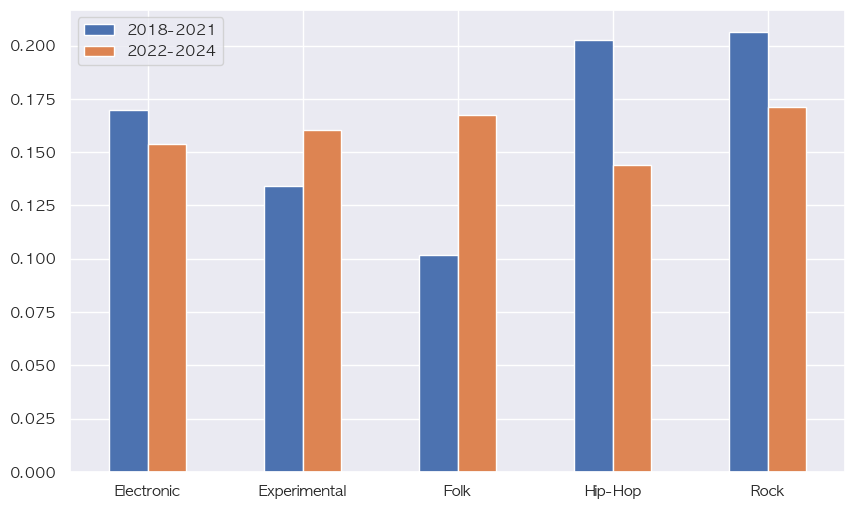

In [176]:
after = pca_df[pca_df["year"].astype(int) > 2021][
    ["Electronic", "Experimental", "Folk", "Hip-Hop", "Rock"]
].mean()

before = pca_df[pca_df["year"].astype(int) <= 2021][
    ["Electronic", "Experimental", "Folk", "Hip-Hop", "Rock"]
].mean()

pd.concat([before.rename("2018-2021"), after.rename("2022-2024")], axis=1).plot(kind="bar", rot=0,figsize=(10,6))

In [177]:
# label_5
with open("./models/le5_le.pkl", "rb") as f:
    le5_le = pickle.load(f)

with open("./models/le5_rfc.pkl", "rb") as f:
    le5_rfc = pickle.load(f)

k_hiphop_le5 = k_hiphop.copy()
k_hiphop_le5["cluster"] = le5_rfc.predict(k_hiphop_le5)
k_hiphop_le5["genre"] = le5_le.inverse_transform(k_hiphop_le5["cluster"])
k_hiphop_le5['genre'].to_frame()

,genre
2018_flex,Hip-Hop
2020_band,Hip-Hop
2019_goodday,Hip-Hop
2023_이현준,Hip-Hop
2022_counting_stars,Electronic
2020_slay,Hip-Hop
2019_indigo,Hip-Hop
2024_youngboy,Hip-Hop
2022_독립음악,Hip-Hop
2018_시차,Hip-Hop


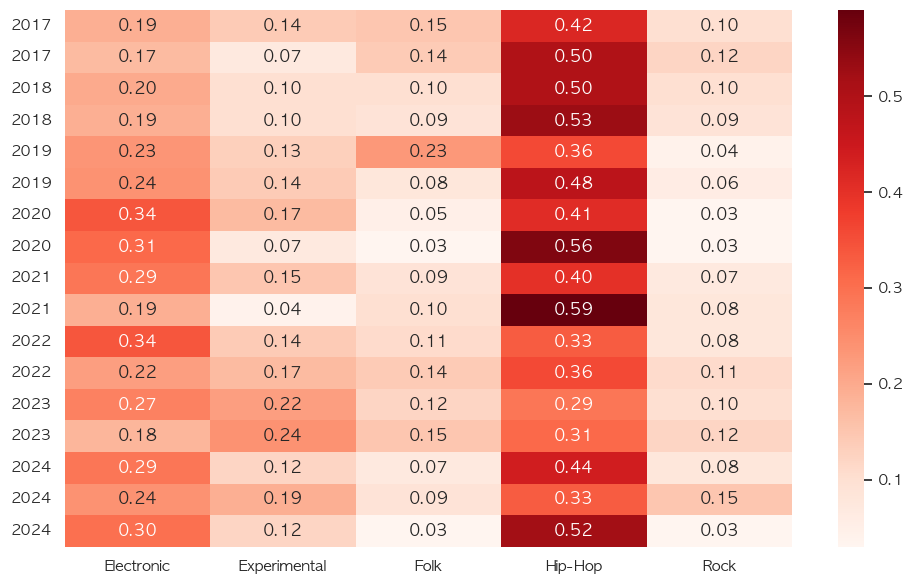

In [178]:
k_hiphop_le5 = k_hiphop.copy()
proba_le5_df = pd.DataFrame(le5_rfc.predict_proba(k_hiphop_le5), index=k_hiphop_le5.index)
proba_le5_df = proba_le5_df.sort_index()
proba_le5_df.columns = le5_le.inverse_transform(proba_le5_df.columns)
proba_le5_df = proba_le5_df.apply(lambda x: round(x, 3))
proba_le5_df.index = proba_le5_df.index

plt.figure(figsize=(10, 6))
sns.heatmap(
    proba_le5_df,
    annot=True,
    fmt=".2f",
    cmap="Reds",
    yticklabels=list(map(lambda x: x.split("_")[0], proba_le5_df.index)),
)
plt.tight_layout()
plt.show()

In [166]:
proba_le5_df

,Electronic,Experimental,Folk,Hip-Hop,Rock
2017_city,0.190,0.140,0.15,0.42,0.100
2017_팔지않아,0.170,0.070,0.14,0.50,0.120
2018_flex,0.200,0.100,0.10,0.50,0.100
2018_시차,0.190,0.100,0.09,0.53,0.090
2019_goodday,0.235,0.132,0.23,0.36,0.043
2019_indigo,0.240,0.140,0.08,0.48,0.060
2020_band,0.340,0.170,0.05,0.41,0.030
2020_slay,0.310,0.070,0.03,0.56,0.030
2021_akira,0.290,0.150,0.09,0.40,0.070
2021_곡예사,0.190,0.040,0.10,0.59,0.080


In [150]:
# label_3
with open("./models/le3_le.pkl", "rb") as f:
    le3_le = pickle.load(f)

with open("./models/le3_rfc.pkl", "rb") as f:
    le3_rfc = pickle.load(f)


k_hiphop_le3 = k_hiphop.copy()
k_hiphop_le3["cluster"] = le3_rfc.predict(k_hiphop_le3)
k_hiphop_le3["genre"] = le3_le.inverse_transform(k_hiphop_le3["cluster"])
k_hiphop_le3["genre"].to_frame()

,genre
2018_flex,Hip-Hop
2020_band,Hip-Hop
2019_goodday,Hip-Hop
2023_이현준,Hip-Hop
2022_counting_stars,Hip-Hop
2020_slay,Hip-Hop
2019_indigo,etc
2024_youngboy,Hip-Hop
2022_독립음악,Hip-Hop
2018_시차,Hip-Hop


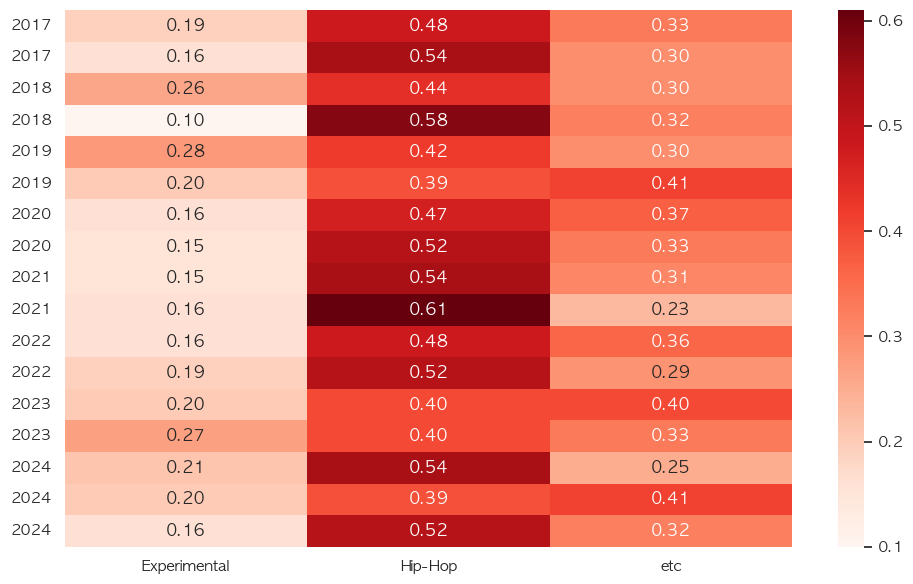

In [179]:
k_hiphop_le3 = k_hiphop.copy()
proba_le3_df = pd.DataFrame(le3_rfc.predict_proba(k_hiphop_le3), index=k_hiphop_le3.index)
proba_le3_df = proba_le3_df.sort_index()
proba_le3_df.columns = le3_le.inverse_transform(proba_le3_df.columns)
proba_le3_df = proba_le3_df.apply(lambda x: round(x, 3))
proba_le3_df.index = proba_le3_df.index
plt.figure(figsize=(10, 6))
sns.heatmap(
    proba_le3_df,
    annot=True,
    fmt=".2f",
    cmap="Reds",
    yticklabels=list(map(lambda x: x.split("_")[0], proba_le3_df.index)),
)

plt.tight_layout()
plt.show()

In [180]:
proba_le3_df

,Experimental,Hip-Hop,etc
2017_city,0.19,0.48,0.33
2017_팔지않아,0.16,0.54,0.30
2018_flex,0.26,0.44,0.30
2018_시차,0.10,0.58,0.32
2019_goodday,0.28,0.42,0.30
2019_indigo,0.20,0.39,0.41
2020_band,0.16,0.47,0.37
2020_slay,0.15,0.52,0.33
2021_akira,0.15,0.54,0.31
2021_곡예사,0.16,0.61,0.23


In [181]:
# label_2
with open("./models/le2_le.pkl", "rb") as f:
    le2_le = pickle.load(f)

with open("./models/le2_rfc.pkl", "rb") as f:
    le2_rfc = pickle.load(f)

k_hiphop_le2 = k_hiphop.copy()
k_hiphop_le2["cluster"] = le2_rfc.predict(k_hiphop_le2)
k_hiphop_le2["genre"] = le2_le.inverse_transform(k_hiphop_le2["cluster"])
k_hiphop_le2['genre'].to_frame()

,genre
2018_flex,Hip-Hop
2020_band,Hip-Hop
2019_goodday,Hip-Hop
2023_이현준,Hip-Hop
2022_counting_stars,Hip-Hop
2020_slay,Hip-Hop
2019_indigo,Hip-Hop
2024_youngboy,Hip-Hop
2022_독립음악,Hip-Hop
2018_시차,Hip-Hop


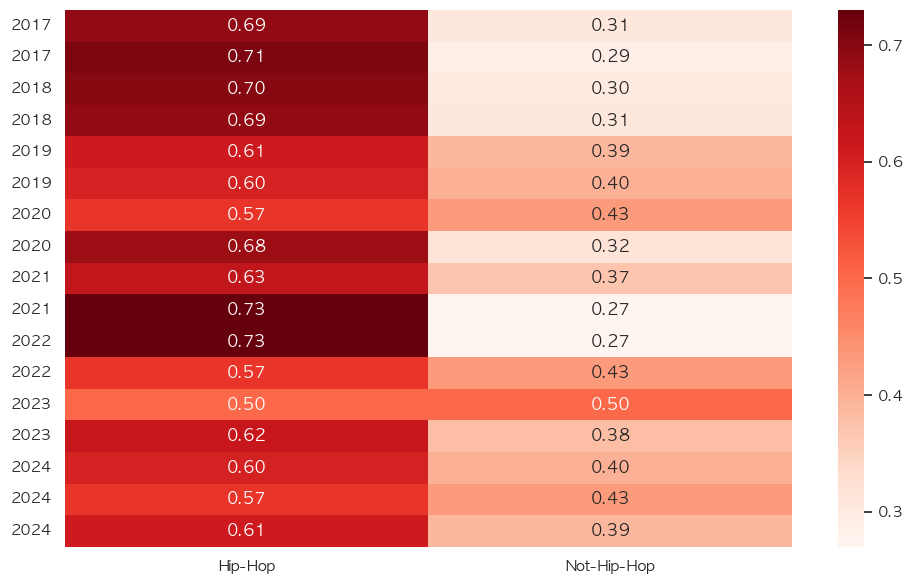

In [182]:
k_hiphop_le2 = k_hiphop.copy()
proba_le2_df = pd.DataFrame(le2_rfc.predict_proba(k_hiphop_le2), index=k_hiphop_le2.index)
proba_le2_df = proba_le2_df.sort_index()
proba_le2_df.columns = le2_le.inverse_transform(proba_le2_df.columns)
proba_le2_df = proba_le2_df.apply(lambda x: round(x, 3))
proba_le2_df.index = proba_le2_df.index
plt.figure(figsize=(10, 6))
sns.heatmap(
    proba_le2_df,
    annot=True,
    fmt=".2f",
    cmap="Reds",
    yticklabels=list(map(lambda x: x.split("_")[0], proba_le2_df.index)),
)
plt.tight_layout()
plt.show()

In [183]:
proba_le2_df

,Hip-Hop,Not-Hip-Hop
2017_city,0.69,0.31
2017_팔지않아,0.71,0.29
2018_flex,0.70,0.30
2018_시차,0.69,0.31
2019_goodday,0.61,0.39
2019_indigo,0.60,0.40
2020_band,0.57,0.43
2020_slay,0.68,0.32
2021_akira,0.63,0.37
2021_곡예사,0.73,0.27
